<a href="https://www.kaggle.com/code/rajibmandal/fraud-detection-using-rfc-and-xgboostrfc-and-dnn?scriptVersionId=160940347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Preparations Basics

In [1]:
import pandas as pd
df = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')
df.shape

(6362620, 11)

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Check for null values

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Dataset description

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
print("Total Fraud-Transaction:", len(df[df['isFraud']==1]))
print("Total Valid-Transaction:", len(df[df['isFraud']==0]))


Total Fraud-Transaction: 8213
Total Valid-Transaction: 6354407


### Distribution of Amount in the dataset

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


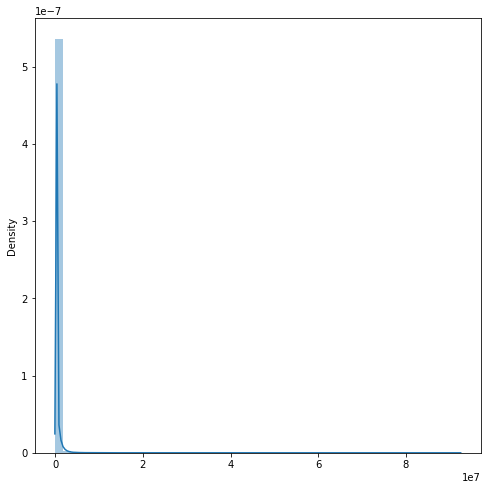

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
amount = [df['amount'].values]
plt.figure(figsize=(8,8))
sns.distplot(amount)
plt.show()

### Distribution of steps in the dataset

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


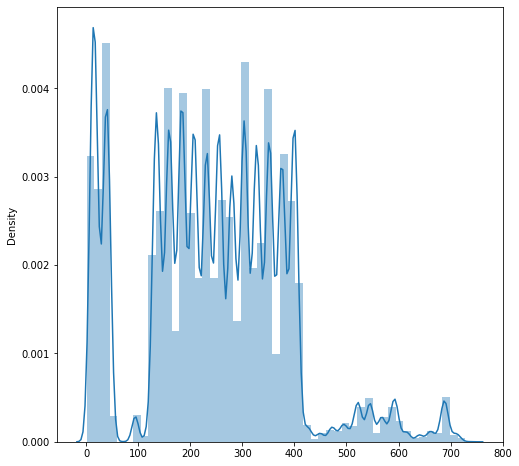

In [9]:
steps = df['step'].values
plt.figure(figsize=(8,8))
sns.distplot(steps)

plt.show()

## Finding Co-relation of the features in the dataset

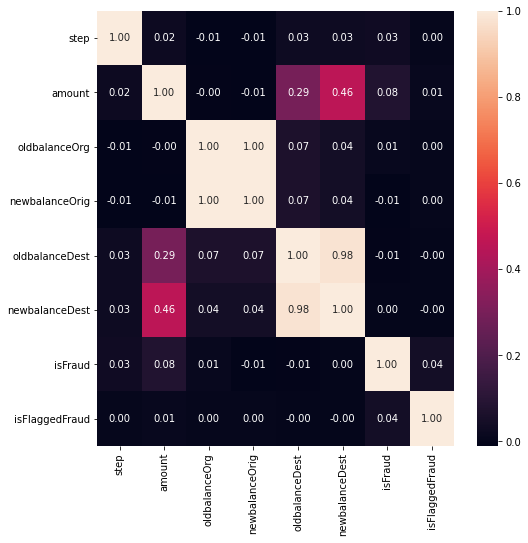

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

### Breaking the dataset into X and Y

In [11]:
## Breaking into X, Y and Y1
X1 = df.iloc[:,:9]
X = X1.drop(['type','nameOrig','nameDest'],axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


In [12]:
X.shape

(6362620, 6)

In [13]:
Y = df.iloc[:,9]
print(Y.shape)
Y.describe()


(6362620,)


count    6.362620e+06
mean     1.290820e-03
std      3.590480e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [14]:
Y1 = df.iloc[:,10]
print(Y1.shape)
Y1.describe()

(6362620,)


count    6.362620e+06
mean     2.514687e-06
std      1.585775e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFlaggedFraud, dtype: float64

### Spliting into training and test set using `train_test_split` (80% training and 20% test examples)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print("Training size:", x_train.shape)
print("Testing size:",x_test.shape)


Training size: (5090096, 6)
Testing size: (1272524, 6)


In [16]:
y_train.describe()

count    5.090096e+06
mean     1.291135e-03
std      3.590916e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [17]:
print("Total Fraud-Transaction in training:",sum(y_train==1))
print("Total Valid-Transaction:", sum(y_train==0))

Total Fraud-Transaction in training: 6572
Total Valid-Transaction: 5083524


# Classification using Simple Random Forest Classifier with 

**Before starting with Random Forest Classifier we need a clear view about decision tree algorithm.**
      
      The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

* For Example - Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not.
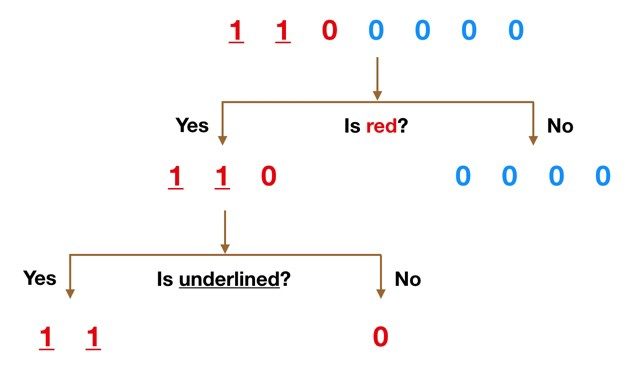



Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.

The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.

The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly. 

***Mathematics behind Decision tree algorithm: ***

Entropy: Entropy is the measures of impurity, disorder, or uncertainty in a bunch of examples.

`Purpose of Entropy:`

Entropy controls how a Decision Tree decides to split the data. It affects how a Decision Tree draws its boundaries.

“Entropy values range from 0 to 1”, Less the value of entropy more it is trusting able.

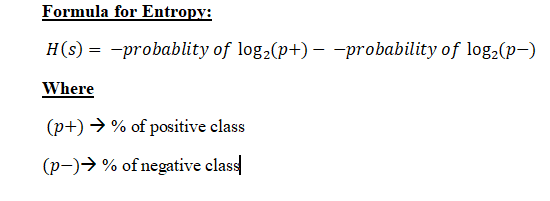

***`Information Gain:`*** Information gain is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the purest daughter nodes. A commonly used measure of purity is called information.

For each node of the tree, the information value measures how much information a feature gives us about the class. The split with the highest information gain will be taken as the first split and the process will continue until all children nodes are pure, or until the information gain is 0.

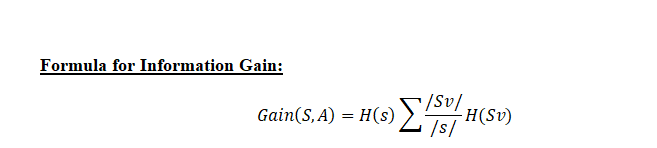

***`Gini Impurity:`***

Gini Impurity is a measurement used to build Decision Trees to determine how the features of a data set should split nodes to form the tree. More precisely, the Gini Impurity of a data set is a number between 0-0.5, which indicates the likelihood of new, random data being miss classified if it were given a random class label according to the class distribution in the data set.

***`Entropy vs Gini Impurity`***

The maximum value for entropy is 1 whereas the maximum value for Gini impurity is 0.5.

As the Gini Impurity does not contain any logarithmic function to calculate it takes less computational time as compared to entropy.

** Random Forest Algorithm**

Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

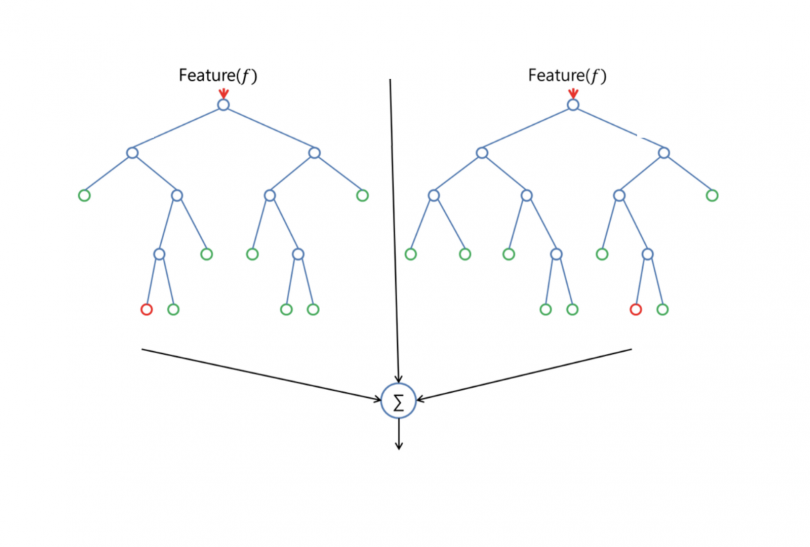

### **Difference between Decision Trees and Random Forests**

While random forest is a collection of decision trees, there are some differences.

If you input a training dataset with features and labels into a decision tree, it will formulate some set of rules, which will be used to make the predictions.

For example, to predict whether a person will click on an online advertisement, you might collect the ads the person clicked on in the past and some features that describe his/her decision. If you put the features and labels into a decision tree, it will generate some rules that help predict whether the advertisement will be clicked or not. In comparison, the random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.

Another difference is "deep" decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets. Afterwards, it combines the subtrees. It's important to note this doesn’t work every time and it also makes the computation slower, depending on how many trees the random forest builds.

### Hyperparameters

The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster. Let's look at the hyperparameters of sklearns built-in random forest function.

**1. Increasing the predictive power**

Firstly, there is the `n_estimators` hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

Another important hyperparameter is `max_features`, which is the maximum number of features random forest considers to split a node. Sklearn provides several options, all described in the documentation.

The last important hyperparameter is `min_sample_leaf`. This determines the minimum number of leafs required to split an internal node.

**2. Increasing the model's speed**

The `n_jobs` hyperparameter tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.

The `random_state` hyperparameter makes the model’s output replicable. The model will always produce the same results when it has a definite value of `random_state` and if it has been given the same hyperparameters and the same training data.

Lastly, there is the `oob_score` (also called oob sampling), which is a random forest cross-validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples. It's very similar to the leave-one-out-cross-validation method, but almost no additional computational burden goes along with it.

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
print(clf.fit(x_train,y_train))


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)


In [19]:
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import classification_report
print('Classifcation report:\n', classification_report(y_test, y_pred))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.98      0.62      0.76      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.81      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.999500991729822


In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_mat)

Confusion Matrix:
 [[1270867      16]
 [    619    1022]]


**Advantages**


One of the biggest advantages of random forest is its versatility. It can be used for both regression and classification tasks, and it’s also easy to view the relative importance it assigns to the input features.

Random forest is also a very handy algorithm because the default hyperparameters it uses often produce a good prediction result. Understanding the hyperparameters is pretty straightforward, and there's also not that many of them. 

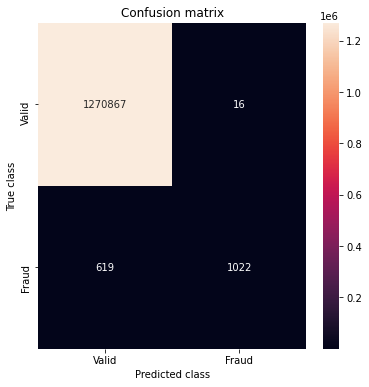

In [23]:
import matplotlib.pyplot as plt

LABELS = ['Valid', 'Fraud'] 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_mat, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

# Number of trees in Random forest  affceting Accuracy of models 

we will try with 10, 50, 100, 500, 1000 trees

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

List of Models to Evaluate

In [25]:
def get_models():
  models = dict()
  n_trees = [3,5,10,20,50]  ### and more number of trees here
  for v in n_trees:
    models[str(v)] = RandomForestClassifier(n_estimators = v, criterion='entropy', random_state=0,max_depth=10)

  return models

Evaluate The models using cross validation and `KFold`

In [26]:
def evaluate_model(models, X,y):
  cv = KFold(n_splits= 10, shuffle = True, random_state= 1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

In [27]:
import numpy as np
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    
	# evaluate the model and collect the results
    scores = evaluate_model(model, X, Y)
	# store the results
    results.append(scores)
    names.append(name)
    # summarize performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    


>3 0.999 (0.000)
>5 0.999 (0.000)
>10 0.999 (0.000)
>20 0.999 (0.000)
>50 0.999 (0.000)


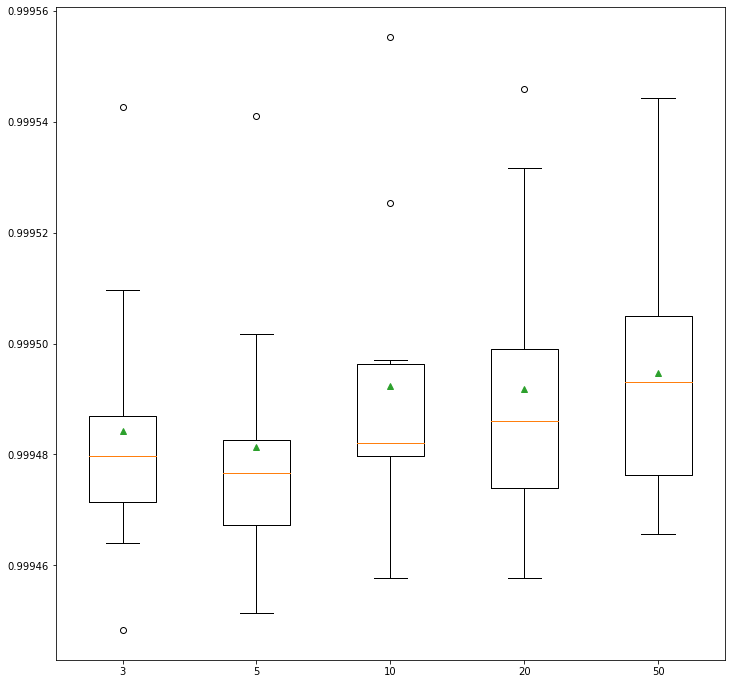

In [28]:
# plot model performance for comparison
plt.figure(figsize=(12,12))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Classification using `xgboost` and Random Forest Classifier

The `XGBoost` library provides two wrapper classes that allow the random forest implementation provided by the library to be used with the scikit-learn machine learning library.
They are the` XGBRFClassifier `and `XGBRFRegressor`classes for classification and regression respectively.

In [29]:
import xgboost
print(xgboost.__version__)
from xgboost import sklearn

1.4.2


In [30]:
!pip install --upgrade xgboost

     |████████████████████████████████| 255.9 MB 28 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.2
    Uninstalling xgboost-1.4.2:
      Successfully uninstalled xgboost-1.4.2


## Define the model



*   The number of trees used in the ensemble can be set via the “n_estimators” argument, and typically, this is increased until no further improvement in performance is observed by the model. Often hundreds or thousands of trees are used.
*   XGBoost does not have support for drawing a bootstrap sample for each decision tree. This is a limitation of the library.
Instead, a subsample of the training dataset, without replacement, can be specified via the “subsample” argument as a percentage between 0.0 and 1.0 (100 percent of rows in the training dataset). Values of 0.8 or 0.9 are recommended to ensure that the dataset is large enough to train a skillful model but different enough to introduce some diversity into the ensemble.
*  The number of features used at each split point when training a model can be specified via the “colsample_bynode” argument and takes a percentage of the number of columns in the dataset from 0.0 to 1.0 (100 percent of input rows in the training dataset).


> For example, If we had 20 input variables in our training dataset and the heuristic for classification problems is the square root of the number of features, then this could be set to sqrt(20) / 20, or about 4 / 20 or 0.2.






Right now we are doing with `n_estimator = 10`


In this notebook we have used a method which will define that  how number of decision trees affects the accuracy of a model using `xgboost Random Forest Classifier` algorithm.
 Due to some system limitation These cell might not be executed, you have 

In [31]:
from xgboost.sklearn import XGBRFClassifier
# model = XGBRFClassifier(n_estimators=20, subsample=0.9, colsample_bynode=0.2)
model = XGBRFClassifier(n_estimators=10)

## Model Evaluation

Model evaluation involves using the available dataset to fit a model and estimate its performance when making predictions on unseen examples.

The two most common approaches used for model evaluation are the train/test split and the k-fold cross-validation procedure. Both approaches can be very effective in general, although they can result in misleading results and potentially fail when used on classification problems with a severe class imbalance. Instead, the techniques must be modified to stratify the sampling by the class label, called stratified train-test split or stratified k-fold cross-validation.






### Model Evaluation procedure

**We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.**


In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=None)

### Evaluate the model and collect score

In [33]:
from sklearn.model_selection import cross_val_score
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [34]:
import numpy as np
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: nan (nan)


In [35]:
v_scores = cross_val_score(model,x_test,y_test,scoring='accuracy', cv=cv,n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(v_scores), np.std(v_scores)))

Mean Accuracy: nan (nan)


# Classification using Deep Learning

As I have already prepared data previously so I need to use 5-layer deep neural networking using the Sequential model in Keras.

## DNN model creation

For the 1st hidden layer, `‘input_dim’` is the number of input variables. ‘units’ is the number of nodes or neurons in each layer.

We use Rectified Linear Unit `(ReLU)` as an activation function for the hidden layers. `ReLU` normally performs better than Sigmoid and Hyperbolic Tangent functions when building deep neural networks. This is because Sigmoid and Tanh tends to saturate when the input value is either too large or too small. In addition, they only show a high gradient around their mid-points, such as 0.5 for sigmoid and 0 for tanh.

We use the Sigmoid function in the output layer for a binary classification problem.

In [36]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [37]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
# dlmodel = Sequential([
# Dense(input_dim = 8, units = 16, activation = ‘relu’),
# Dense(units = 24, activation = ‘relu’),
# Dropout(0.5),
# Dense(units = 20, activation = ‘relu’),
# Dense(units = 24, activation = ‘relu’),
# Dense(units =1, activation = ‘sigmoid’),])


dlmodel = Sequential()
dlmodel.add(Dense(input_dim =6, units=16, activation='relu'))
dlmodel.add(Dense(units=24, activation='relu'))
dlmodel.add(Dropout(0.5))
dlmodel.add(Dense(units=20, activation='relu'))
dlmodel.add(Dense(units=24, activation='relu'))
dlmodel.add(Dense(units=1, activation='sigmoid')) 

## DNN model evaluation

we use `‘binary_crossentropy’` as the loss function and `‘Adam’` to update network weights. `‘Adam’` is a popular algorithm to achieve good results fast in the deep learning field.

In [39]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
dlmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_log = dlmodel.fit(x_train, y_train, batch_size = 100, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
50901/50901 [==============================] - 93s 2ms/step - loss: 136.7959 - accuracy: 0.9939 - val_loss: 0.0336 - val_accuracy: 0.9987
Epoch 2/10
50901/50901 [==============================] - 94s 2ms/step - loss: 0.8022 - accuracy: 0.9987 - val_loss: 0.6967 - val_accuracy: 0.9987
Epoch 3/10
50901/50901 [==============================] - 95s 2ms/step - loss: 0.7621 - accuracy: 0.9987 - val_loss: 0.4763 - val_accuracy: 0.9987
Epoch 4/10
50901/50901 [==============================] - 95s 2ms/step - loss: 0.5453 - accuracy: 0.9987 - val_loss: 0.0233 - val_accuracy: 0.9987
Epoch 5/10
50901/50901 [==============================] - 94s 2ms/step - loss: 0.1552 - accuracy: 0.9987 - val_loss: 0.0262 - val_accuracy: 0.9987
Epoch 6/10
50901/50901 [==============================] - 95s 2ms/step - loss: 0.0665 - accuracy: 0.9987 - val_loss: 0.0837 - val_accuracy: 0.9987
Epoch 7/10
50901/50901 [==============================] - 101s 2ms/step - loss: 0.0901 - accuracy: 0.9987 - val_loss

In [40]:
score = dlmodel.evaluate(x_test,y_test)
print("Accuracy:",score[1]*100,"%")

39767/39767 [==============================] - 40s 999us/step - loss: 0.0123 - accuracy: 0.9987
Accuracy: 99.87104535102844 %


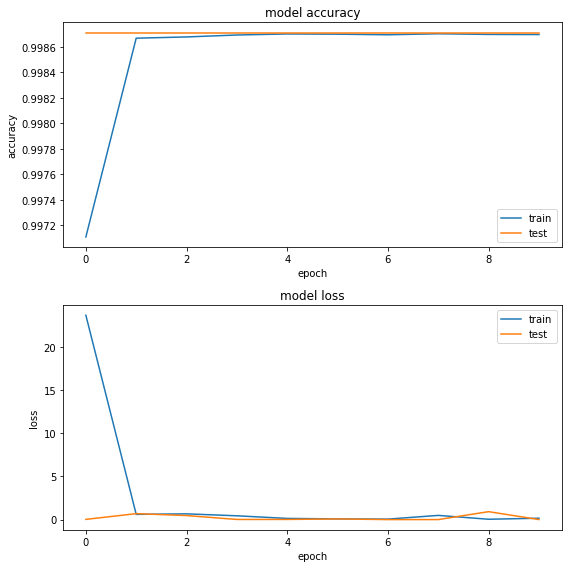

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()